 # ***32119- Param Chordiya***
# ***Assignment 3***


# Computational Stats
TE Sem I Honors in AI/ML
Academic Year: 2021-22
Lab Assignment No. 3


### Problem Statement:
•	Load the dataset: birthwt Risk Factors Associated with Low Infant Birth Weight
1.	Test the association of mother’s (age) age and baby’s birth weight (bwt) using the correlation test and linear regression. 
2.	Test the association of mother’s weight (weight) and birth weight (bwt) using the correlation test and linear regression. 
3.	Produce two scatter plots of: 
(i)	mother’s age by baby’s birth weight; 
(ii)	mother’s weight by baby’s birth weight.
Objective
Elaborate the Conclusion based on the performed analysis.

### Dataset Description:
Taken from Stat Labs by Nolan and Speed, originally from the Child Health and Development Studies conducted at the Oakland, CA, Kaiser Foundation Hospital. The variables are
1.	bwt: baby's weight in ounces at birth
2.	gestation: duration of pregnancy in days
3.	parity: parity indicator (first born = 1, later birth = 0)
4.	age: mother's age in years
5.	height: mother's height in inches
6.	weight: mother's weight in pounds (during pregnancy)
7.	smoke: indicator for whether mother smokes (1=yes, 0=no)




# Importing the needed libraries

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reading the dataset

In [2]:
df = pd.read_csv("Bwt.csv")
print(df)

      Unnamed: 0  bwt  gestation  parity  age  height  weight  smoke
0              1  120        284       0   27      62     100      0
1              2  113        282       0   33      64     135      0
2              3  128        279       0   28      64     115      1
3              4  108        282       0   23      67     125      1
4              5  136        286       0   25      62      93      0
...          ...  ...        ...     ...  ...     ...     ...    ...
1169        1170  113        275       1   27      60     100      0
1170        1171  128        265       0   24      67     120      0
1171        1172  130        291       0   30      65     150      1
1172        1173  125        281       1   21      65     110      0
1173        1174  117        297       0   38      65     129      0

[1174 rows x 8 columns]


# Drop the "Unnamed" column

In [3]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
print(df)

      bwt  gestation  parity  age  height  weight  smoke
0     120        284       0   27      62     100      0
1     113        282       0   33      64     135      0
2     128        279       0   28      64     115      1
3     108        282       0   23      67     125      1
4     136        286       0   25      62      93      0
...   ...        ...     ...  ...     ...     ...    ...
1169  113        275       1   27      60     100      0
1170  128        265       0   24      67     120      0
1171  130        291       0   30      65     150      1
1172  125        281       1   21      65     110      0
1173  117        297       0   38      65     129      0

[1174 rows x 7 columns]


# Describing the dataset

In [4]:
df.describe(include="all")

,bwt,gestation,parity,age,height,weight,smoke
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,119.462521,279.101363,0.262351,27.228279,64.049404,128.478705,0.390971
std,18.328671,16.010305,0.440100,5.817839,2.526102,20.734282,0.488176
min,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,108.000000,272.000000,0.000000,23.000000,62.000000,114.250000,0.000000
50%,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


# Printing the first 5 values of the dataset

In [5]:
df.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,108,282,0,23,67,125,1
4,136,286,0,25,62,93,0


# Printing the last 5 values of the dataset

In [6]:
df.tail()

,bwt,gestation,parity,age,height,weight,smoke
1169,113,275,1,27,60,100,0
1170,128,265,0,24,67,120,0
1171,130,291,0,30,65,150,1
1172,125,281,1,21,65,110,0
1173,117,297,0,38,65,129,0


# Visualizing Correlation

In [7]:
df.corr()

,bwt,gestation,parity,age,height,weight,smoke
bwt,1.000000,0.407543,-0.043908,0.026983,0.203704,0.155923,-0.246800
gestation,0.407543,1.000000,0.080916,-0.053425,0.070470,0.023655,-0.060267
parity,-0.043908,0.080916,1.000000,-0.351041,0.043543,-0.096362,-0.009599
age,0.026983,-0.053425,-0.351041,1.000000,-0.006453,0.147322,-0.067772
height,0.203704,0.070470,0.043543,-0.006453,1.000000,0.435287,0.017507
weight,0.155923,0.023655,-0.096362,0.147322,0.435287,1.000000,-0.060281
smoke,-0.246800,-0.060267,-0.009599,-0.067772,0.017507,-0.060281,1.000000


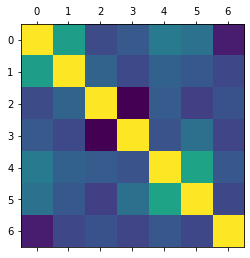

In [8]:
plt.matshow(df.corr())
plt.show()

In [9]:
df.corr().style.background_gradient(cmap='coolwarm')

,bwt,gestation,parity,age,height,weight,smoke
bwt,1,0.407543,-0.0439082,0.0269829,0.203704,0.155923,-0.2468
gestation,0.407543,1,0.080916,-0.0534248,0.0704699,0.0236549,-0.0602668
parity,-0.0439082,0.080916,1,-0.351041,0.0435435,-0.0963621,-0.00959897
age,0.0269829,-0.0534248,-0.351041,1,-0.00645285,0.147322,-0.0677719
height,0.203704,0.0704699,0.0435435,-0.00645285,1,0.435287,0.0175066
weight,0.155923,0.0236549,-0.0963621,0.147322,0.435287,1,-0.0602814
smoke,-0.2468,-0.0602668,-0.00959897,-0.0677719,0.0175066,-0.0602814,1


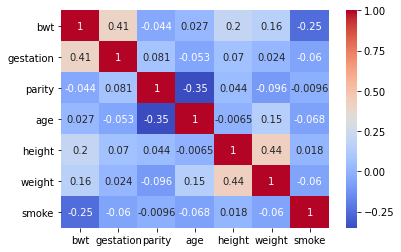

In [10]:
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

Dark red means positive, Blue means negative. The stronger the color, the larger the correlation magnitude.

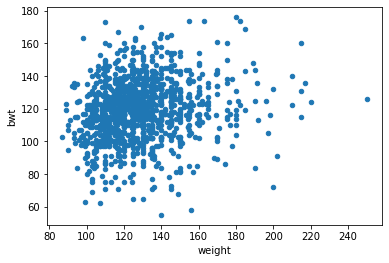

In [11]:
df.plot.scatter(x='weight',y='bwt')

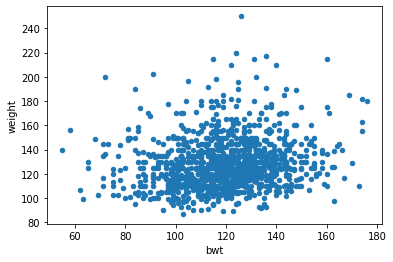

In [12]:
df.plot.scatter(x='bwt',y='weight')

In [13]:
corrMatrix = df.corr().abs()

upperMatrix = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
corrFutures = [column for column in upperMatrix.columns if any(upperMatrix[column] > 0.90)]

In [14]:
df.drop(columns=corrFutures)

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,108,282,0,23,67,125,1
4,136,286,0,25,62,93,0
...,...,...,...,...,...,...,...
1169,113,275,1,27,60,100,0
1170,128,265,0,24,67,120,0
1171,130,291,0,30,65,150,1
1172,125,281,1,21,65,110,0


In [15]:
df.head(10)

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,108,282,0,23,67,125,1
4,136,286,0,25,62,93,0
5,138,244,0,33,62,178,0
6,132,245,0,23,65,140,0
7,120,289,0,25,62,125,0
8,143,299,0,30,66,136,1
9,140,351,0,27,68,120,0


#	Testing the association of mother’s (age) age and baby’s birth weight (bwt) using the correlation test and linear regression. 

In [16]:
print("Correlation : ", df['age'].corr(df['bwt']))

Correlation :  0.026982911002929492


 Correlation between Mother's Age and Baby's Birth Weight is ***very low*** 

#######################################################################################################

# ***Training the Linear Regression model for mother’s age and baby’s birth weight (bwt)***

Testing the association of mother’s weight (weight) and birth weight (bwt) using the correlation test and linear regression. 

In [17]:
print("Correlation : ", df['weight'].corr(df['bwt']))

Correlation :  0.1559232701870693


In [18]:
df.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,108,282,0,23,67,125,1
4,136,286,0,25,62,93,0


In [19]:
X = df.iloc[:,3:4]
y = df.iloc[:,0:1]

In [20]:
print(X)

      age
0      27
1      33
2      28
3      23
4      25
...   ...
1169   27
1170   24
1171   30
1172   21
1173   38

[1174 rows x 1 columns]


In [21]:
print(y)

      bwt
0     120
1     113
2     128
3     108
4     136
...   ...
1169  113
1170  128
1171  130
1172  125
1173  117

[1174 rows x 1 columns]


Splitting the dataset

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
# Upto here was the builing part, now we have to train the model after we have built it

In [24]:
# To connect our model we use the fit method

# X_train contains the features of the dataset
# y_train contins the dependant varaibles 
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting test results

In [25]:
regressor.predict(X_test)
# This returns a vector containg the predicted data

array([[119.90720144],
       [121.10662306],
       [119.82152847],
       [119.47883658],
       [120.07854739],
       [119.56450955],
       [120.76393117],
       [119.56450955],
       [119.56450955],
       [120.16422036],
       [120.16422036],
       [120.3355663 ],
       [120.24989333],
       [119.56450955],
       [120.3355663 ],
       [119.99287441],
       [119.56450955],
       [119.47883658],
       [121.277969  ],
       [120.3355663 ],
       [121.02095008],
       [119.56450955],
       [120.59258522],
       [119.65018252],
       [120.93527711],
       [119.90720144],
       [119.82152847],
       [119.82152847],
       [120.42123928],
       [120.07854739],
       [119.90720144],
       [120.93527711],
       [119.56450955],
       [120.93527711],
       [120.93527711],
       [119.82152847],
       [119.65018252],
       [119.90720144],
       [119.90720144],
       [119.56450955],
       [119.82152847],
       [119.65018252],
       [120.16422036],
       [119

In [26]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

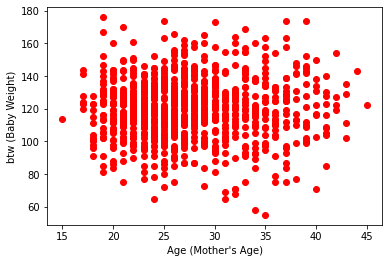

In [27]:
# scatter method allows us to put points/coordinates
plt.xlabel("Age (Mother's Age)")
plt.ylabel("btw (Baby Weight)")
plt.scatter(X_train, y_train, color="red") # Real vlaues
plt.show()

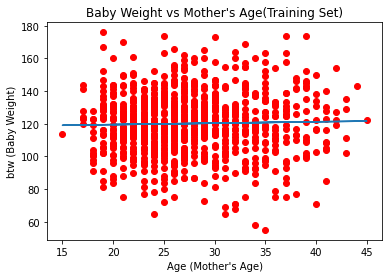

In [28]:
plt.title("Baby Weight vs Mother's Age(Training Set)")
plt.ylabel("btw (Baby Weight)")
plt.xlabel("Age (Mother's Age)")
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train))
# show is used to display the graphic in the output
plt.show()

# Red dots are real values of salary (x_train, y_train)
# Blue line is the best fit line on training X_train and predicting X_train on itself

## Visualising the Test set results

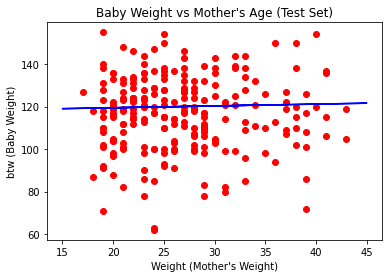

In [29]:
plt.title("Baby Weight vs Mother's Age (Test Set)")
plt.ylabel("btw (Baby Weight)")
plt.xlabel("Weight (Mother's Weight)")
plt.scatter(X_test, y_test, color="red")

# Predicted salries of test set will on the same rgression line as the predicted salaries on the training set
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.show()

# Red are new observations(test set)
# Blue is our best fit line after traning on the available train dataset

## Getting the final linear regression equation with the values of the coefficients

# Getting slope and intercept

In [30]:
print(regressor.coef_)
print(regressor.intercept_)

[[0.08567297]]
[117.76537712]


Therefore, the equation of our simple linear regression model is:

$$\textrm{Baby_weight} = 0.08567297 \times \textrm{Mother_age} + 117.76537712$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

#######################################################################################################

# ***Training the Linear Regression model for mother’s weight and baby’s birth weight (bwt)***

Testing the association of mother’s Age (age) and Baby Weight (bwt) using the correlation test and linear regression. 

In [31]:
print("Correlation : ", df['weight'].corr(df['bwt']))

Correlation :  0.1559232701870693


In [32]:
df.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,108,282,0,23,67,125,1
4,136,286,0,25,62,93,0


In [33]:
X = df.iloc[:,5:6]
y = df.iloc[:,0:1]

In [34]:
print(X)

      weight
0        100
1        135
2        115
3        125
4         93
...      ...
1169     100
1170     120
1171     150
1172     110
1173     129

[1174 rows x 1 columns]


In [35]:
print(y)

      bwt
0     120
1     113
2     128
3     108
4     136
...   ...
1169  113
1170  128
1171  130
1172  125
1173  117

[1174 rows x 1 columns]


Splitting the dataset

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
# Upto here was the builing part, now we have to train the model after we have built it

In [38]:
# To connect our model we use the fit method

# X_train contains the features of the dataset
# y_train contins the dependant varaibles 
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting test results

In [39]:
regressor.predict(X_test)
# This returns a vector containg the predicted data

array([[117.94326462],
       [120.91631601],
       [120.91631601],
       [118.71884324],
       [117.94326462],
       [119.75294808],
       [119.88221118],
       [116.77989668],
       [118.97736945],
       [126.73315569],
       [115.09947633],
       [117.03842289],
       [118.97736945],
       [116.65063358],
       [114.71168702],
       [119.23589566],
       [122.85526257],
       [120.5285267 ],
       [128.15504984],
       [121.04557912],
       [120.27000049],
       [122.85526257],
       [126.47462948],
       [116.39210737],
       [118.20179083],
       [122.46747326],
       [123.50157809],
       [116.13358116],
       [120.78705291],
       [119.75294808],
       [119.88221118],
       [124.01863051],
       [120.27000049],
       [121.30410532],
       [120.27000049],
       [117.2969491 ],
       [120.27000049],
       [117.2969491 ],
       [120.91631601],
       [120.27000049],
       [122.46747326],
       [120.5285267 ],
       [122.20894705],
       [120

In [40]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

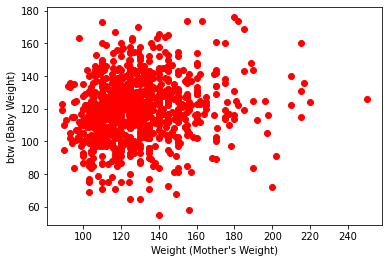

In [41]:
# scatter method allows us to put points/coordinates
plt.ylabel("btw (Baby Weight)")
plt.xlabel("Weight (Mother's Weight)")
plt.scatter(X_train, y_train, color="red") # Real vlaues
plt.show()

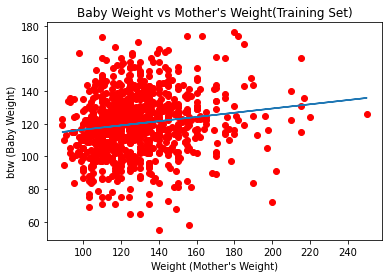

In [42]:
plt.title("Baby Weight vs Mother's Weight(Training Set)")
plt.ylabel("btw (Baby Weight)")
plt.xlabel("Weight (Mother's Weight)")
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train))
# show is used to display the graphic in the output
plt.show()

# Red dots are real values of salary (x_train, y_train)
# Blue line is the best fit line on training X_train and predicting X_train on itself

## Visualising the Test set results

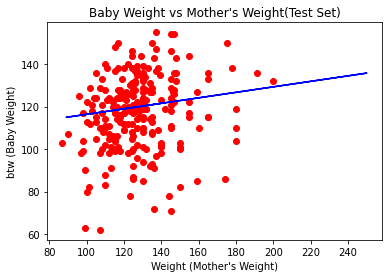

In [43]:
plt.title("Baby Weight vs Mother's Weight(Test Set)")
plt.ylabel("btw (Baby Weight)")
plt.xlabel("Weight (Mother's Weight)")
plt.scatter(X_test, y_test, color="red")

# Predicted salries of test set will on the same rgression line as the predicted salaries on the training set
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.show()

# Red are new observations(test set)
# Blue is our best fit line after traning on the available train dataset

## Getting the final linear regression equation with the values of the coefficients

# Getting slope and intercept

In [44]:
print(regressor.coef_)
print(regressor.intercept_)

[[0.1292631]]
[103.46579697]


Therefore, the equation of our simple linear regression model is:

$$\textrm{Baby_weight} = 0.17099362 \times \textrm{Mother_weight} + 108.20571737$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

# **Inference:**

1. For both the set of variables (mother's age, baby's birth weight) and (mother's weight, baby's birth weight), the regression model estimated almost no relation between the variables ie. both variables are not dependant.
2. The correlation value for both the set of variables were found to be very low which supports the above conclusion.